In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
iris = load_iris(as_frame=True)
iris_df = iris.data   
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris_df.shape

(150, 4)

In [4]:
iris = load_iris()
X = iris.data
y = iris.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [6]:
k_values = range(1, 21)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k} → Accuracy = {acc:.3f}")

K=1 → Accuracy = 0.967
K=2 → Accuracy = 0.933
K=3 → Accuracy = 1.000
K=4 → Accuracy = 1.000
K=5 → Accuracy = 1.000
K=6 → Accuracy = 0.967
K=7 → Accuracy = 0.967
K=8 → Accuracy = 0.967
K=9 → Accuracy = 1.000
K=10 → Accuracy = 1.000
K=11 → Accuracy = 0.967
K=12 → Accuracy = 0.967
K=13 → Accuracy = 0.967
K=14 → Accuracy = 0.967
K=15 → Accuracy = 0.967
K=16 → Accuracy = 0.967
K=17 → Accuracy = 0.967
K=18 → Accuracy = 0.967
K=19 → Accuracy = 0.967
K=20 → Accuracy = 0.933


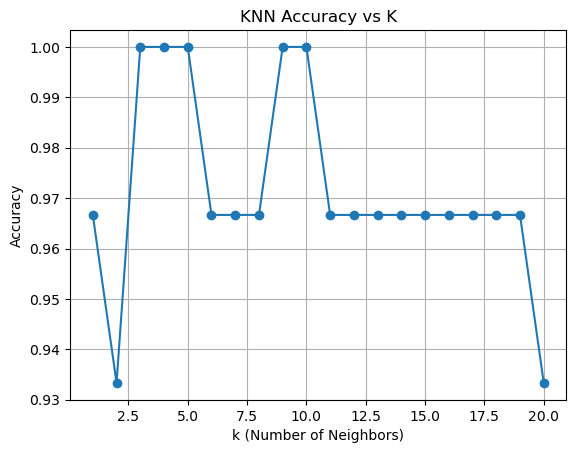

In [7]:
k_values = range(1, 21)
plt.plot(k_values, accuracies, marker="o")
plt.title("KNN Accuracy vs K")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [8]:
log_reg = LogisticRegression(max_iter=150)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
log_acc = accuracy_score(y_test, y_pred_log)

print(f"Logistic Regression → Accuracy = {log_acc:.3f}")

Logistic Regression → Accuracy = 0.967


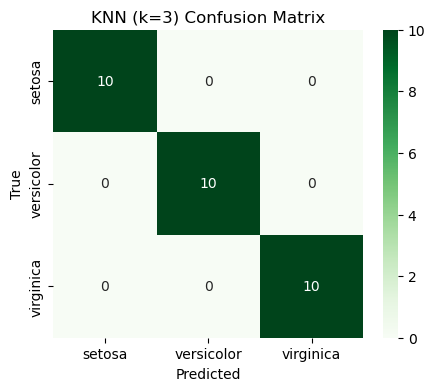

In [9]:
best_k = 3
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(5,4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Greens",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title(f"KNN (k={best_k}) Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#####  K-Nearest Neighbors (KNN) with k=3, 4, 5, 9, 10 achieved 100% accuracy, correctly classifying every flower, while Logistic Regression reached about 96.7% accuracy,
##### making a few mistakes mainly between versicolor and virginica. Both models performed very well, but KNN was slightly better here because Iris is a small, 
##### well-separated dataset. 
##### Logistic Regression is still strong and faster for large datasets, but in this case, KNN was the clear winner.